# Working with personal data requests


In [91]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

### Your task

Import your own personal data file (or better yet, several of them!). Extract just the timestamp data. Export this timestamp data as a CSV file and save it on your machine.


### What if you have _other_ types of data?

A summary of pandas input/output (I/O) tools is [here](https://pandas.pydata.org/docs/user_guide/io.html). Here are some things we can directly import:
* CSVs
* JSON
* text (rtf, txt)
* HTML
* MS Excel
* Pickle (Python file format)
* Parquet
* And many others...

With HTML, you might want to parse it using Beautiful Soup.

For PDFs, you might need to use a tool like [Tabula](https://pypi.org/project/tabula-py/) (a Java tool, which runs in a Python wrapper) to extract the text from the PDF into a table format. _(Note: To use it, I had to install/update Java, and then install the Tabula package! A bit annoying, but not too bad...)_ Once I did that, though, it was fairly easy to run.

If you are having issues getting Tabula installed on your machine:
* make sure you try following the installation instructions [here](https://pypi.org/project/tabula-py/)
* you can also try running it in a Google Colab notebook, example [here](https://colab.research.google.com/github/chezou/tabula-py/blob/master/examples/tabula_example.ipynb)



# Part 1

In [51]:
with open('StreamingHistory5.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    
dfC = pd.json_normalize(data)

dfC.to_csv('StreamingHistory5.csv', index=False)
dfC

,endTime,artistName,trackName,msPlayed
0,2023-03-14 22:17,MIMI,Ai no Sukima,13200
1,2023-03-14 22:17,Volbeat,Ecotone,13250
2,2023-03-14 22:17,Anri,A HOPE FROM SAD STREET,870
3,2023-03-14 22:17,SQUARE ENIX MUSIC,Dispossession - Strings Ver.,1250
4,2023-03-14 22:17,Interlunium,Intergalactic Disco,1240
...,...,...,...,...
550,2023-03-15 21:50,Jolianne,Halfway There,1439
551,2023-03-15 21:50,Tevvez,Legend,835
552,2023-03-15 21:50,Slowbarry,Мёртвый Внутри,1137
553,2023-03-15 21:50,Elton John,Goodbye Yellow Brick Road - Remastered 2014,1811


In [53]:
df_timeStampC = dfC[['endTime']]
df_timeStampC

,endTime
0,2023-03-14 22:17
1,2023-03-14 22:17
2,2023-03-14 22:17
3,2023-03-14 22:17
4,2023-03-14 22:17
...,...
550,2023-03-15 21:50
551,2023-03-15 21:50
552,2023-03-15 21:50
553,2023-03-15 21:50


# Part 2

In [55]:
file_path = ("~/Downloads/data.csv")
df_timeStampC.to_csv(file_path, index=False)

In [127]:
df = pd.read_csv('Hayden.csv')

In [76]:
df_timeStamp = df[['timestamp']]
df_timeStamp.sort_values('timestamp', inplace=True)


/tmp/ipykernel_381285/4190435708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp.sort_values('timestamp', inplace=True)


In [77]:


df_timeStamp['timestamp'] = pd.to_datetime(df_timeStamp['timestamp'], utc=True)

# Compute the time difference between consecutive timestamps
df_timeStamp['time_diff'] = df_timeStamp['timestamp'].diff()

# Print the DataFrame
df_timeStamp

/tmp/ipykernel_381285/1174293504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp['timestamp'] = pd.to_datetime(df_timeStamp['timestamp'], utc=True)
/tmp/ipykernel_381285/1174293504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp['time_diff'] = df_timeStamp['timestamp'].diff()


,timestamp,time_diff
38799,2022-06-26 05:47:10+00:00,NaT
38798,2022-06-26 05:48:04+00:00,0 days 00:00:54
38797,2022-06-26 05:48:48+00:00,0 days 00:00:44
38796,2022-06-26 05:49:56+00:00,0 days 00:01:08
38795,2022-06-26 05:50:00+00:00,0 days 00:00:04
...,...,...
4,2023-04-04 16:32:21+00:00,0 days 00:00:10
3,2023-04-04 16:34:10+00:00,0 days 00:01:49
2,2023-04-04 16:35:12+00:00,0 days 00:01:02
1,2023-04-04 16:35:59+00:00,0 days 00:00:47


In [79]:
max_idx = df_timeStamp['time_diff'].idxmax()
max_row = df_timeStamp.loc[max_idx]
print(max_row)

timestamp    2022-11-06 01:02:28+00:00
time_diff              0 days 18:01:51
Name: 19097, dtype: object


In [61]:
#longest time between timestamps is 18:01:51

In [80]:
time_diff = df_timeStamp['timestamp'].diff()

# calculate the mean time difference
mean_time_diff = time_diff.mean()
mean_time_diff

Timedelta('0 days 00:10:29.009227041')

In [63]:
# average of ~10 minutes 30 seconds between timestamps

In [82]:
df_timeStamp['date'] = df_timeStamp['timestamp'].dt.date

# Group the data by date and count the number of timestamps for each date
date_counts = df_timeStamp.groupby('date').size().reset_index(name='count')

# Sort the data in descending order by the count of timestamps
date_counts = date_counts.sort_values(by='count', ascending=False)

# Take the first row to get the date with the most timestamps
most_timestamps_date = date_counts.iloc[0]['date']

most_timestamps_date

/tmp/ipykernel_381285/2066841223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp['date'] = df_timeStamp['timestamp'].dt.date


datetime.date(2022, 6, 28)

In [83]:
#the day with the most timestamps is june 28th 2022

In [84]:
df_timeStamp['month'] = df_timeStamp['timestamp'].dt.month

# Count the occurrences of each month
month_counts = df_timeStamp['month'].value_counts()

# Get the month with the highest count
most_common_month = month_counts.index[0]

most_common_month

/tmp/ipykernel_381285/671398508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp['month'] = df_timeStamp['timestamp'].dt.month


7

In [85]:
#July is the most common month

In [86]:
#I think this data is from Youtube watch history. The timestamps are
#too far apart to be music, unless Hayden listens to music infrequently.
#the amount of instances, 38000, seems possible for youtube videos
# watched in a year.

#Titles would be helpful in determining the source of the data because
#different types of media follow certain titling patterns.

In [87]:
#My partners analysis seems accurate. They guessed the correct data
#source as Spotify.

In [88]:
#The titles would be helpful in determining what was happening on the
#days with the most timestamps because maybe the person was watching
#a series on youtube, or studying for an exam through youtube tutors.

In [89]:
#I learned that my partner watches a lot of youtube, like me! 
#I also learned that my partner and I watch similar videos.

# Part 3

In [134]:
df_Cameron = pd.read_csv('data.csv')
df_timeStamp['timestamp2'] = df_Cameron['endTime']

/tmp/ipykernel_381285/1559057003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp['timestamp2'] = df_Cameron['endTime']


/tmp/ipykernel_381285/2633468457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp['timestamp2'] = pd.to_datetime(df_timeStamp['timestamp2'])


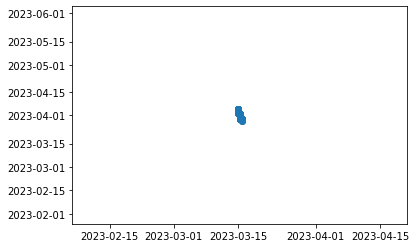

In [137]:
df_timeStamp['timestamp2'] = pd.to_datetime(df_timeStamp['timestamp2'])

plt.scatter(df_timeStamp['timestamp2'], df_timeStamp['timestamp'])
plt.show()